In [1]:
"""
Here we use the shap feature importance values calculated by SHAP_Importance_Slim.ipynb script for overall analysis (Fig. 3C-B).
"""

'\nHere we use the shap feature importance values calculated by SHAP_Importance_Slim.ipynb script for overall analysis (Fig. C-B).\n'

In [2]:
import os
import pandas as pd
import collections
import seaborn as sns
# import  matplotlib
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
import numpy as np
from matplotlib.patches import PathPatch


plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = True
plt.rcParams['axes.spines.bottom'] = False
plt.rcParams.update({'font.size': 12})
plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True


In [3]:

path = os.path.join('..', '..', 'Output', 'Relevant_Columns_Names_Groups_Edited.csv')
Feature_Groups_df = pd.read_csv(path)
Feature_Groups_df.rename(columns={'Feature Name':'col_name'}, inplace=True)
print(Feature_Groups_df)
all_groups = Feature_Groups_df['Feature_Group_Edited'].unique()
print(all_groups)

trace_features_gruops = ['PPIs', ' Paralog compensation', ' Preferential expression', ' Expression ',
 ' Biological processes', ' Expression time ', ' eQTLs ',
 'Expression variability (donors)', 'Expression variability (time)']

     Unnamed: 0                   Feature  \
0             0  Whole_Brain_diff_net_max   
1             1  Whole_Blood_diff_net_max   
2             2       Vagina_diff_net_max   
3             3       Uterus_diff_net_max   
4             4      Thyroid_diff_net_max   
..          ...                       ...   
597         597            Domain_ndomain   
598         598              Domain_other   
599         599               Domain_sigp   
600         600      Dst2SplType_ACCEPTOR   
601         601         Dst2SplType_DONOR   

                                     col_name               Feature_Group  \
0    Whole Brain  | Differential interactions   Differential interactions   
1          Blood  | Differential interactions   Differential interactions   
2         Vagina  | Differential interactions   Differential interactions   
3         Uterus  | Differential interactions   Differential interactions   
4        Thyroid  | Differential interactions   Differential interactions 

In [4]:
importance_directory = os.listdir(os.path.join('..', '..', 'Output', 'SHAP_Importance_Slim'))
importance_directory = [f for f in importance_directory if '.csv' in f]
print(importance_directory)
all_importance_df_list = []

palette ={"Genetic": "cornflowerblue", "General Tissue": "grey", "Tissue-Specific": "indianred"}

for file in importance_directory:
    path = os.path.join('..', '..', 'Output', 'SHAP_Importance_Slim', file)
    tissue = file.split('_')[0]
    Importance = pd.read_csv(open(path, 'r', errors='ignore'), delimiter=',') 
    Importance = pd.merge(Importance, Feature_Groups_df, on='col_name')

    Importance['Tissue'] = tissue
    Importance['Kind'] = 'Genetic'
    tissue_word = tissue.split(' ')[0]
    if 'brain' in tissue:
        tissue_word = 'Brain'
    elif 'Whole' in tissue:
        tissue_word = 'Blood'
    elif 'kidney' in tissue:
        tissue_word = 'Kidney'
    print('@', tissue, tissue_word)

    Importance.loc[Importance.Feature_Group_Edited.isin(trace_features_gruops), 'Kind'] = 'General Tissue'
    Importance.loc[Importance['col_name'].str.contains('|'.join([tissue_word, tissue_word.lower()])), 'Kind'] = 'Tissue-Specific'
    sum_importance = Importance['feature_importance_vals'].sum()
    importance_max = Importance[Importance['Kind'].str.contains('Tissue')]['feature_importance_vals'].max()
    Importance['Normalized Importance'] = Importance['feature_importance_vals'].div(sum_importance)
    Importance['Normalized Importance Max'] = Importance['feature_importance_vals'].div(importance_max)

    all_importance_df_list.append(Importance)


All_Tissues_Importance = pd.concat(all_importance_df_list, axis=0)
All_Tissues_Importance = All_Tissues_Importance[~All_Tissues_Importance['Tissue'].isin(['Skin - Sun Exposed Skin', 'Heart - Atrial Appendage'])]            
print(All_Tissues_Importance)
path = os.path.join('..', '..', 'Output', 'All_Tissues_Importance.csv')
All_Tissues_Importance.to_csv(path, index=None)


['Lung_Shap_Importance_Slim.csv', 'Heart - Atrial Appendage_Shap_Importance_Slim.csv', 'Muscle - Skeletal_Shap_Importance_Slim.csv', 'brain_Shap_Importance_Slim.csv', 'Artery - Aorta_Shap_Importance_Slim.csv', 'kidney_Shap_Importance_Slim.csv', 'Liver_Shap_Importance_Slim.csv', 'Skin - Not Sun Exposed_Shap_Importance_Slim.csv', 'Ovary_Shap_Importance_Slim.csv', 'Pituitary_Shap_Importance_Slim.csv', 'brain-0_Shap_Importance_Slim.csv', 'brain-2_Shap_Importance_Slim.csv', 'Nerve - Tibial_Shap_Importance_Slim.csv', 'Heart - Left Ventricle_Shap_Importance_Slim.csv', 'Skin - Sun Exposed_Shap_Importance_Slim.csv', 'brain-3_Shap_Importance_Slim.csv', 'Whole Blood_Shap_Importance_Slim.csv', 'brain-1_Shap_Importance_Slim.csv', 'Testis_Shap_Importance_Slim.csv']
@ Lung Lung
@ Heart - Atrial Appendage Heart
@ Muscle - Skeletal Muscle
@ brain Brain
@ Artery - Aorta Artery
@ kidney Kidney
@ Liver Liver
@ Skin - Not Sun Exposed Skin
@ Ovary Ovary
@ Pituitary Pituitary
@ brain-0 Brain
@ brain-2 Brain


In [5]:

Sum_Gruop_Importance = All_Tissues_Importance[All_Tissues_Importance['Kind']!='General Tissue'].groupby('Feature_Group_Edited')['Normalized Importance'].median()#mean
Sum_Gruop_Importance = pd.DataFrame(Sum_Gruop_Importance)
Sum_Gruop_Importance.sort_values('Normalized Importance', inplace=True, ascending=False)
print(Sum_Gruop_Importance)

ordered_groups = Sum_Gruop_Importance.index.tolist()
print(ordered_groups)


                                 Normalized Importance
Feature_Group_Edited                                  
 Pathogenic score                             0.004901
 Biological processes                         0.003725
 Preferential expression                      0.003409
Expression variability (donors)               0.003319
 Conservation                                 0.003089
 Type                                         0.002473
 Expression time                              0.001880
Expression variability (time)                 0.001773
 Expression                                   0.001478
 eQTLs                                        0.001398
 Variant location                             0.001208
PPIs                                          0.001142
 Type                                         0.001043
 Variant frequency                            0.000750
 GC content                                   0.000589
 Paralog compensation                         0.000379
 Splicing 

In [6]:


CADD_Features = All_Tissues_Importance[All_Tissues_Importance['Kind']=='Genetic']
print(CADD_Features)
cadd_groups = CADD_Features['Feature_Group_Edited'].unique().tolist()
cadd_order = [c for c in ordered_groups if c in cadd_groups]
TRACE_Features = All_Tissues_Importance[All_Tissues_Importance['Kind']!='Genetic']
print(TRACE_Features)


                                  col_name  feature_importance_vals  \
0       CADD | Pathogenic score (RawScore)                89.658355   
1          CADD | Pathogenic score (PHRED)                87.883691   
4           CADD | Consequence (ConsScore)                40.094482   
17         CADD | Consequence (STOPGAINED)                23.953097   
31         CADD | Conservation (verPhyloP)                18.042909   
..                                     ...                      ...   
575           CADD | AnnoType (Intergenic)                 0.000000   
576  CADD | Consequence (NONCODING CHANGE)                 0.000000   
577                  CADD | Domain (other)                 0.000000   
578        CADD | Consequence (DOWNSTREAM)                 0.000000   
579  CADD | AnnoType (NonCodingTranscript)                 0.000000   

     Unnamed: 0                       Feature       Feature_Group  \
0           533                      RawScore   Pathogenic score    
1        

/home/chanana/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


@  Preferential expression
MannwhitneyuResult(statistic=50348.0, pvalue=1.4629616475442913e-10)
@  Expression time 
MannwhitneyuResult(statistic=355266.0, pvalue=1.8643300422527662e-44)
@ Expression variability (donors)
MannwhitneyuResult(statistic=5447.0, pvalue=0.00024064188836956678)
@ Expression variability (time)
MannwhitneyuResult(statistic=599.0, pvalue=0.4336978783683272)
@ PPIs
MannwhitneyuResult(statistic=168834.0, pvalue=5.2859047966222925e-11)
@  eQTLs 
MannwhitneyuResult(statistic=34085.0, pvalue=0.17342395060895327)
@  Biological processes
MannwhitneyuResult(statistic=11624.0, pvalue=1.6378390616723867e-07)
@  Expression 
MannwhitneyuResult(statistic=54297.0, pvalue=9.044779339171052e-16)
@  Paralog compensation
MannwhitneyuResult(statistic=38181.0, pvalue=0.042497343874793585)
[' Preferential expression', ' Expression time ', 'Expression variability (donors)', 'Expression variability (time)', 'PPIs', ' eQTLs ', ' Biological processes', ' Expression ', ' Paralog compensat

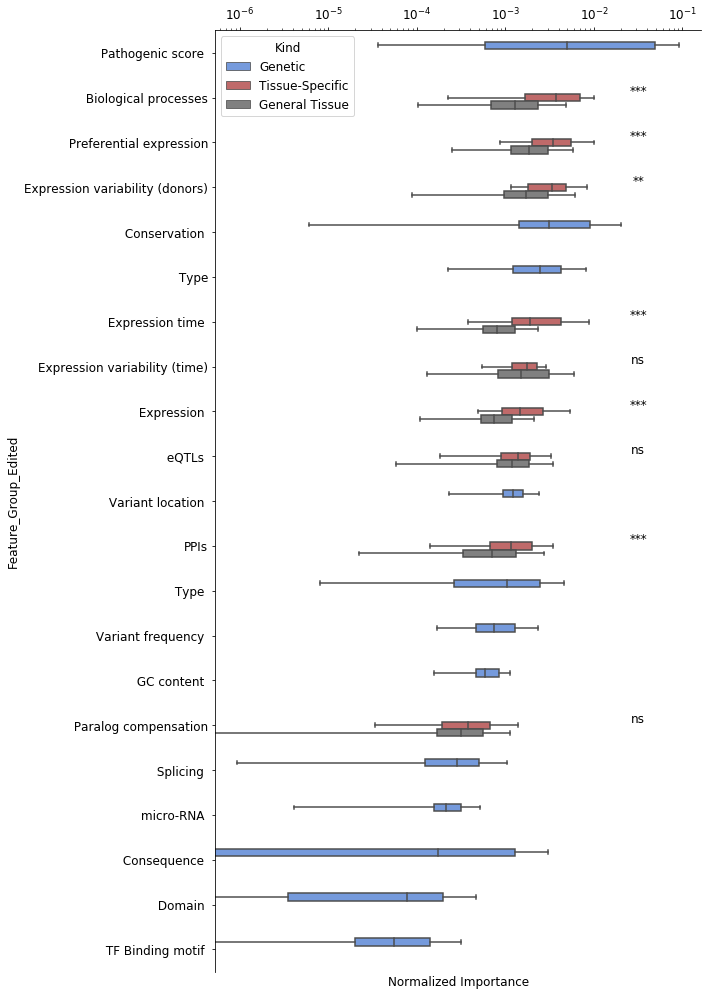

In [7]:
from statsmodels.stats.multitest import multipletests

trace_groups = TRACE_Features['Feature_Group_Edited'].unique().tolist()
trace_order = [c for c in ordered_groups if c in trace_groups]


fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 14))
All_Tissues_Importance['Normalized Importance'] = All_Tissues_Importance['Normalized Importance'].astype('float')
All_Tissues_Importance['log(Normalized Importance)'] =  np.log2(All_Tissues_Importance['Normalized Importance'])
sns.boxplot(y="Feature_Group_Edited", x="Normalized Importance", data=All_Tissues_Importance, hue='Kind', showfliers=False, order=ordered_groups, palette=palette, ax=axes, width=0.5, hue_order = ["Genetic", "Tissue-Specific",  "General Tissue"])#, order=ordered_groups, palette=color_dict, [All_Tissues_Importance['Kind']!='General Tissue']
axes.set_xscale('log')
# plt.show()
pv_list = []
trace_groups = []
for fg in TRACE_Features['Feature_Group_Edited'].unique():
    tissue_specific_values = TRACE_Features['Normalized Importance'][(TRACE_Features['Kind'] == 'Tissue-Specific')&(TRACE_Features['Feature_Group_Edited'] == fg)].tolist()
    other_tissue_values = TRACE_Features['Normalized Importance'][(TRACE_Features['Kind'] == 'General Tissue')&(TRACE_Features['Feature_Group_Edited'] == fg)].tolist()
    test_results = sts.mannwhitneyu(tissue_specific_values, other_tissue_values, alternative='greater')
    print('@', fg)
    print(test_results)
    
    pv_list.append(test_results[1])
    trace_groups.append(fg)
    
pv_list_bh = multipletests(pv_list, method='fdr_bh')[1]
print(trace_groups)
print(pv_list_bh)
test_results_dict = {}

for i in range(0, len(trace_groups)):
    test_results_dict[trace_groups[i]] = pv_list_bh[i]

print(test_results_dict)

stars_dict = {}
c = 0
for key in test_results_dict:
    if test_results_dict[key] < (2.7182**-10):
        stars_dict[key] = '***'
    elif test_results_dict[key] < (2.7182**-5):
        stars_dict[key] = '**'
    elif test_results_dict[key] < (0.05):
        stars_dict[key] = '*'
    else:
        stars_dict[key] = 'ns'
    plt.text(  10**-1.5, ordered_groups.index(key),  stars_dict[key], ha='center', va='bottom', color='k')#, fontsize=20
    c +=1
    
plt.tight_layout()
path = os.path.join('..', '..','Results', 'Feature Importance Figs','Importance_Groups_Slim.jpg')
plt.savefig(path)

In [8]:
"------------------------------ Number of features per group -------------------------"
for g in All_Tissues_Importance['Feature_Group_Edited'].unique():
    features_list = All_Tissues_Importance['col_name'][All_Tissues_Importance['Feature_Group_Edited'] == g].unique()
    print('@', g, len(features_list))

@  Pathogenic score  5
@  Preferential expression 54
@  Consequence  19
@  Expression time  134
@ Expression variability (donors) 19
@ Expression variability (time) 7
@ PPIs 98
@  eQTLs  48
@  Conservation  11
@  Biological processes 28
@  Expression  54
@  Type 1
@  Variant frequency  10
@  Type  3
@  Variant location  7
@  Domain  6
@  TF Binding motif  6
@  Splicing  12
@  GC content  2
@  Paralog compensation 53
@  micro-RNA  3


all_tissues_list 18 ['Lung', 'Muscle - Skeletal', 'brain', 'Artery - Aorta', 'kidney', 'Liver', 'Skin - Not Sun Exposed', 'Ovary', 'Pituitary', 'brain-0', 'brain-2', 'Nerve - Tibial', 'Heart - Left Ventricle', 'Skin - Sun Exposed', 'brain-3', 'Whole Blood', 'brain-1', 'Testis']
                                  col_name  feature_importance_vals  \
0       CADD | Pathogenic score (RawScore)                89.658355   
1          CADD | Pathogenic score (PHRED)                87.883691   
2        Thyroid | Preferential expression                43.938766   
3      Pituitary | Preferential expression                42.103560   
4           CADD | Consequence (ConsScore)                40.094482   
..                                     ...                      ...   
575           CADD | AnnoType (Intergenic)                 0.000000   
576  CADD | Consequence (NONCODING CHANGE)                 0.000000   
577                  CADD | Domain (other)                 0.000000   
578        

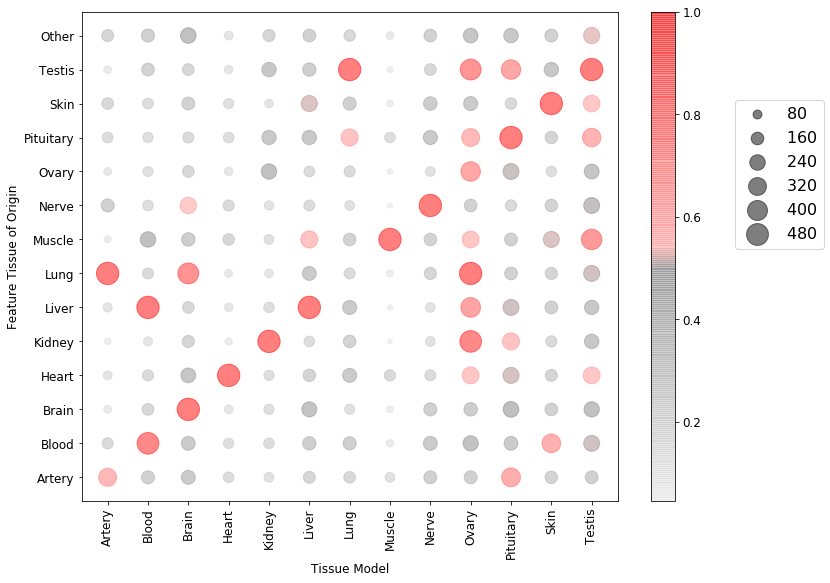

In [9]:
import matplotlib.colors as mcolors

plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.right'] = True
plt.rcParams['axes.spines.top'] = True
plt.rcParams['axes.spines.bottom'] = True
plt.rcParams.update({'font.size': 12})
plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = True
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False

all_tissues_list = All_Tissues_Importance['Tissue'].unique().tolist()
relevant_tissues_list = ['Artery',  'Brain',  'Heart', 'kidney', 'Liver', 'Lung', 'Muscle', 'Nerve', 'Ovary', 'Pituitary',  'Skin', 'Testis', 'Blood']#'Uterus',Thyroid
print('all_tissues_list', len(all_tissues_list), all_tissues_list)
All_Tissues_Importance['Feature Tissue of Origin'] = 'Other'
for tissue in relevant_tissues_list:
    All_Tissues_Importance.loc[All_Tissues_Importance['col_name'].str.contains('|'.join([tissue,tissue.capitalize()])), 'Feature Tissue of Origin'] = tissue.capitalize()



All_Tissues_Importance.loc[All_Tissues_Importance['Kind']=='Genetic', 'Feature Tissue of Origin'] = 'Genetic'

print(All_Tissues_Importance)
all_tissues_list2 = ['Artery - Aorta', 'brain', 'Heart - Left Ventricle', 'kidney', 'Liver', 'Lung', 'Muscle - Skeletal', 'Nerve - Tibial', 'Ovary', 'Pituitary', 'Skin - Not Sun Exposed', 'Testis', 'Whole Blood']
sum_groups_list = []
for tissue in all_tissues_list2:
    Sum_Gruop_Importance = All_Tissues_Importance[All_Tissues_Importance['Tissue'] == tissue].groupby('Feature Tissue of Origin')['Normalized Importance'].mean()  # median
    Sum_Gruop_Importance = pd.DataFrame(Sum_Gruop_Importance)
    Sum_Gruop_Importance['Tissue'] = relevant_tissues_list[all_tissues_list2.index(tissue)]
    Sum_Gruop_Importance.reset_index(inplace=True)

    Sum_Gruop_Importance = Sum_Gruop_Importance[Sum_Gruop_Importance['Feature Tissue of Origin'] !='Genetic']
    Sum_Gruop_Importance['Normal_Max'] = Sum_Gruop_Importance['Normalized Importance'].div(Sum_Gruop_Importance['Normalized Importance'].max())

    Sum_Gruop_Importance.sort_values(by='Normal_Max', ascending=False, inplace=True)
    print(Sum_Gruop_Importance)
    sum_groups_list.append(Sum_Gruop_Importance)
    
Sum_All_Babble = pd.concat(sum_groups_list, axis=0, ignore_index=True)
Sum_All_Babble.loc[Sum_All_Babble['Tissue']=='kidney', 'Tissue'] = 'Kidney'

print(Sum_All_Babble)

order_y = Sum_All_Babble['Tissue'].tolist()
order = ['Brain','Pituitary', 'Nerve', 'Muscle', 'Heart', 'Artery', 'Kidney', 'Liver',  'Blood', 'Skin', 'Testis',  'Ovary', 'Lung' , 'Other']
order2 = [x for x in order if x != 'Other']
order2.sort()
order2.append('Other')
print('order2', order2)

custom_dict = {t:order2.index(t) for t in order}
Sum_All_Babble.sort_values(by=['Feature Tissue of Origin', 'Tissue'], key=lambda x: x.map(custom_dict), inplace=True)
plt.rcParams.update({'font.size': 12})

colors1 = plt.cm.binary(np.linspace(0.1, 0.5, 12))
colors2 = plt.cm.bwr(np.linspace(0.7, 1, 12))

colors = np.vstack((colors1, colors2))
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)
s=Sum_All_Babble[Sum_All_Babble['Feature Tissue of Origin'] !='Genetic']['Normalized Importance']*60000
sc = plt.scatter('Tissue', "Feature Tissue of Origin", s=Sum_All_Babble[Sum_All_Babble['Feature Tissue of Origin'] !='Genetic']['Normal_Max']*500, alpha=0.5, data=Sum_All_Babble[Sum_All_Babble['Feature Tissue of Origin'] !='Genetic'], c='Normal_Max', cmap=mymap)# 'bwr'RdGy_r color = Sum_All_Babble[Sum_All_Babble['Feature Tissue of Origin'] !='Genetic']['Max_Label']
plt.colorbar()
plt.legend(*sc.legend_elements("sizes", num=6), loc="lower right", fontsize='small', bbox_to_anchor=(1.4, 0.5), prop={'size': 16})
print('sc', *sc.legend_elements("sizes", num=6))

fig = plt.gcf()
fig.set_size_inches(12, 9)
plt.ylabel('Feature Tissue of Origin')
plt.xlabel('Tissue Model')

print(order)
plt.xticks(rotation=90)

path = os.path.join('..', '..','Results', 'Feature Importance Figs','Babble_Plot_Importance_Slim.jpg')
plt.savefig(path)





In [10]:
Sum_All_Babble_Relevant = Sum_All_Babble[Sum_All_Babble['Feature Tissue of Origin'] !='Genetic']
print(Sum_All_Babble_Relevant)

for tissue in Sum_All_Babble_Relevant['Tissue'].unique():
    print('@', tissue)
    Tissue_Data = Sum_All_Babble_Relevant[Sum_All_Babble_Relevant['Tissue'] == tissue].copy(deep=True)
    Tissue_Data.sort_values('Normal_Max', ascending=False, inplace=True)
    print(Tissue_Data.head(3))


    Feature Tissue of Origin  Normalized Importance     Tissue  Normal_Max
1                     Artery               0.004939     Artery    0.650376
172                   Artery               0.001494      Blood    0.340232
19                    Artery               0.000716      Brain    0.390213
31                    Artery               0.001486      Heart    0.228970
52                    Artery               0.001017     Kidney    0.196403
..                       ...                    ...        ...         ...
104                    Other               0.001467      Nerve    0.325635
121                    Other               0.001353      Ovary    0.433773
134                    Other               0.001583  Pituitary    0.421765
144                    Other               0.001373       Skin    0.333774
159                    Other               0.001423     Testis    0.529846

[182 rows x 4 columns]
@ Artery
  Feature Tissue of Origin  Normalized Importance  Tissue  Normal_M

In [11]:
"------------------------------ Feature Numbers -------------------------"
total_features = len(All_Tissues_Importance['col_name'].unique())
print('total_features', total_features)

cadd_features = len(All_Tissues_Importance['col_name'][All_Tissues_Importance['col_name'].str.contains('CADD')].unique())
print('cadd_features', cadd_features)

tissue_features = total_features - cadd_features
print('tissue_features', tissue_features)

print(All_Tissues_Importance)


total_features 580
cadd_features 85
tissue_features 495
                                  col_name  feature_importance_vals  \
0       CADD | Pathogenic score (RawScore)                89.658355   
1          CADD | Pathogenic score (PHRED)                87.883691   
2        Thyroid | Preferential expression                43.938766   
3      Pituitary | Preferential expression                42.103560   
4           CADD | Consequence (ConsScore)                40.094482   
..                                     ...                      ...   
575           CADD | AnnoType (Intergenic)                 0.000000   
576  CADD | Consequence (NONCODING CHANGE)                 0.000000   
577                  CADD | Domain (other)                 0.000000   
578        CADD | Consequence (DOWNSTREAM)                 0.000000   
579  CADD | AnnoType (NonCodingTranscript)                 0.000000   

     Unnamed: 0                            Feature             Feature_Group  \
0          

In [12]:
print('trace_features_gruops', len(trace_features_gruops), trace_features_gruops)
print('cadd_groups', len(cadd_groups), cadd_groups)



trace_features_gruops 9 ['PPIs', ' Paralog compensation', ' Preferential expression', ' Expression ', ' Biological processes', ' Expression time ', ' eQTLs ', 'Expression variability (donors)', 'Expression variability (time)']
cadd_groups 12 [' Pathogenic score ', ' Consequence ', ' Conservation ', ' Type', ' Variant frequency ', ' Type ', ' Variant location ', ' Domain ', ' TF Binding motif ', ' Splicing ', ' GC content ', ' micro-RNA ']


In [13]:
All_Tissues_Importance = All_Tissues_Importance[~All_Tissues_Importance['Tissue'].isin(['Skin - Sun Exposed', 'Heart - Atrial Appendage', 'brain-0', 'brain-1', 'brain-2', 'brain-3' ])]            
All_Sum_Gruop_Importance = All_Tissues_Importance[(All_Tissues_Importance['Kind'] == 'Tissue-Specific')].groupby(['Feature_Group', 'Tissue'])['Normalized Importance Max'].mean()  # median
All_Sum_Gruop_Importance = pd.DataFrame(All_Sum_Gruop_Importance)
All_Sum_Gruop_Importance.reset_index(inplace = True)
print(All_Sum_Gruop_Importance)


             Feature_Group                  Tissue  Normalized Importance Max
0     Biological processes          Artery - Aorta                   0.800650
1     Biological processes  Heart - Left Ventricle                   0.499131
2     Biological processes                   Liver                   0.352928
3     Biological processes                    Lung                   0.014697
4     Biological processes       Muscle - Skeletal                   0.376777
..                     ...                     ...                        ...
101                 eQTLs                Pituitary                   0.112628
102                 eQTLs   Skin - Not Sun Exposed                   0.117264
103                 eQTLs                   Testis                   0.090790
104                 eQTLs              Whole Blood                   0.199212
105                 eQTLs                    brain                   0.035983

[106 rows x 3 columns]


['Artery' 'Heart' 'Liver' 'Lung' 'Skeletal Muscle' 'Nerve' 'Ovary'
 'Pituitary' 'Skin' 'Testis' 'Blood' 'Brain' 'Kidney']


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 <a list of 13 Text xticklabel objects>)

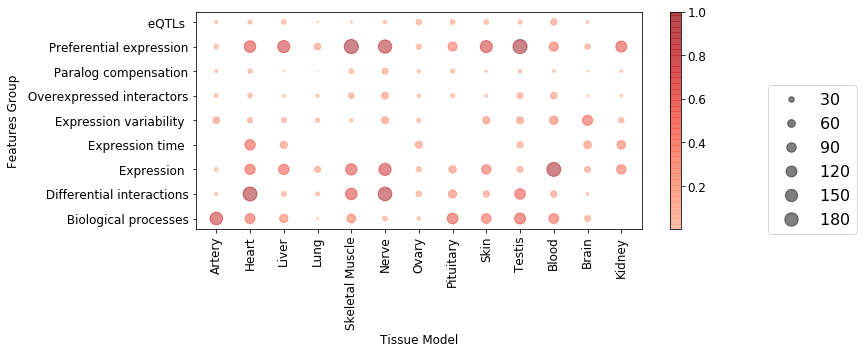

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))
colors = plt.cm.Reds(np.linspace(0.3, 0.9, 20))
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)
tissue_dict = {'Artery - Aorta': 'Artery', 'Heart - Left Ventricle': 'Heart', 'Liver':'Liver',  'Lung':'Lung', 
 'Muscle - Skeletal':'Skeletal Muscle', 'Nerve - Tibial':'Nerve', 'Ovary':'Ovary', 'Pituitary':'Pituitary',
 'Skin - Not Sun Exposed':'Skin', 'Testis':'Testis', 'Whole Blood':'Blood', 'brain':'Brain', 'kidney':'Kidney'}
for t in tissue_dict:
    All_Sum_Gruop_Importance.loc[All_Sum_Gruop_Importance['Tissue'] == t, 'Tissue'] = tissue_dict[t]
print(All_Sum_Gruop_Importance['Tissue'].unique())
sc = plt.scatter('Tissue', "Feature_Group", s=All_Sum_Gruop_Importance['Normalized Importance Max']*200, alpha=0.5, data=All_Sum_Gruop_Importance,  cmap=mymap, c='Normalized Importance Max')# c=All_Sum_Gruop_Importance['Normalized Importance'],

plt.ylabel('Features Group')
plt.xlabel('Tissue Model')
plt.colorbar()
plt.legend(*sc.legend_elements("sizes", num=6),  fontsize='small',  prop={'size': 16}, loc="best",bbox_to_anchor=(1.5, 0.7),)
plt.xticks(rotation=90)


In [15]:
for tissue in All_Sum_Gruop_Importance['Tissue'].unique():
    print('@', tissue)
    Tissue_Data = All_Sum_Gruop_Importance[All_Sum_Gruop_Importance['Tissue'] == tissue].copy(deep=True)
    Tissue_Data.sort_values('Normalized Importance Max', ascending=False, inplace=True)
    print(Tissue_Data.head(3))

@ Artery
               Feature_Group  Tissue  Normalized Importance Max
0       Biological processes  Artery                   0.800650
43   Expression variability   Artery                   0.222820
81   Preferential expression  Artery                   0.102128
@ Heart
                 Feature_Group Tissue  Normalized Importance Max
13   Differential interactions  Heart                   0.972078
82     Preferential expression  Heart                   0.667012
37            Expression time   Heart                   0.544060
@ Liver
               Feature_Group Tissue  Normalized Importance Max
83   Preferential expression  Liver                   0.737073
26               Expression   Liver                   0.546275
2       Biological processes  Liver                   0.352928
@ Lung
               Feature_Group Tissue  Normalized Importance Max
84   Preferential expression   Lung                   0.219045
27               Expression    Lung                   0.190519
46   Expres